# Planning course notebook

Planning is the art of producing a sequence of actions that brings an agent from given initial states to given goal states, knowing the model of the agent's state transition model.
While the dynamics of the environment can be deterministic or probabilistic, the main differences with Reinforcement Learning are the following:
- knowledge of a white-box state transition model defined as a state-to-state mapping or as a probability distribution over next states given the current state ;
- knowledge of the reward or cost function, or more specifically of a set of goal states to reach ;
- optimization of the sequence of actions, named a _plan_, offline without interacting with the environment but reasoning about the white-box state transition function.

It is worth mentioning that the reward or cost function can result from a simulation (e.g. aircraft performance model to compute fuel computation in flight planning).
Only the next state - or the probability distribution over next states - must be known beforehand by most planning algorithms.

A famous planning problem, the Towers of Hanoi:

![Towers of Hanoi](tower-of-hanoi.png)

## Definition of a planning problem

In its simplest form, a (deterministic) planning process is defined by a tuple $(S, A, T, C, s_i, G)$ where:
- $S$ is a finite set of states ;
- $A$ is a finite set of actions ;
- $T : S, A \rightarrow S$ is a transition function that maps a given state-action pair to a next state ;
- $C : S, A \rightarrow \mathbb{R}$ is a cost function that assigns a cost to a given state-action pair (transition) ;
- $s_i \in S$ is an initial state.
- $G \subset S$ is a set of goal states.

A _plan_ $\pi$ is a sequence of actions: $\pi \in \bigcup_{n \in \mathbb{N}_+} A^n$.
The execution of any given plan $\pi$ from the initial state $s_i$ produces a sequence of states $\sigma(\pi) = T( \cdots T( T(s_i, \pi[0]), \pi[1]), \cdots , \pi[n-1]) \in \bigcup_{n \in \mathbb{N}_+} S^n$ where $\vert \pi \vert$ is the length of $\pi$.
The cost of a plan $\pi$ is defined by $C(\pi) = \sum_{0 \leqslant n \leqslant \vert \pi \vert} c(\sigma(\pi)[n], \pi[n])$, i.e. the cumulative cost obtained by executing $\pi$ from the initial state $s_i$.

A planning problem $(\mathcal{P})$ consists in finding a plan that reaches a goal state in $G$ from the initial state $s_i$ in minimum cost:

$ \displaystyle (\mathcal{P}) \; \min_{\pi \in \bigcup_{n \in \mathbb{N}_+} A^n} C(\pi) \; \text{such that} \; \sigma(\pi)[n-1] \in G$

## A simple example: the famous maze problem

Let's consider a maze as defined with the following code below.

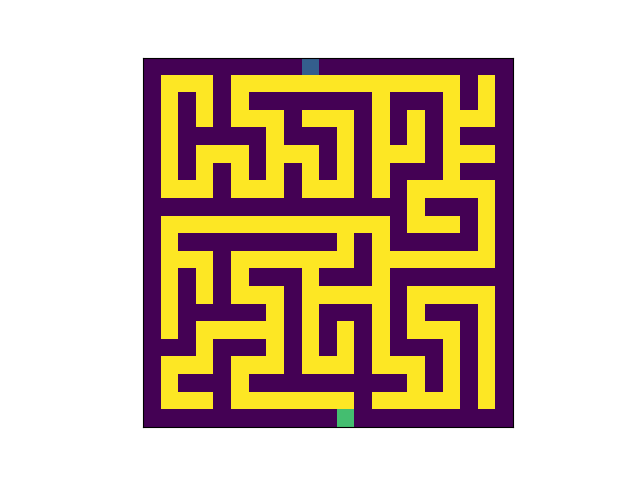

In [4]:
from copy import deepcopy
from enum import Enum
from typing import Any, NamedTuple, Tuple, List

# %matplotlib inline
import matplotlib.pyplot as plt
from IPython.display import display, clear_output


DEFAULT_MAZE = """
+-+-+-+-+o+-+-+-+-+-+
|   |             | |
+ + + +-+-+-+ +-+ + +
| | |   |   | | |   |
+ +-+-+ +-+ + + + +-+
| |   |   | |   |   |
+ + + + + + + +-+ +-+
|   |   |   | |     |
+-+-+-+-+-+-+-+ +-+ +
|             |   | |
+ +-+-+-+-+ + +-+-+ +
|   |       |       |
+ + + +-+ +-+ +-+-+-+
| | |   |     |     |
+ +-+-+ + +-+ + +-+ +
| |     | | | |   | |
+-+ +-+ + + + +-+ + +
|   |   |   |   | | |
+ +-+ +-+-+-+-+ + + +
|   |       |     | |
+-+-+-+-+-+x+-+-+-+-+
"""


class State(NamedTuple):
    x: int
    y: int


class Action(Enum):
    up = 0
    down = 1
    left = 2
    right = 3


class Maze:
    def __init__(self, maze_str: str = DEFAULT_MAZE):
        maze = []
        for y, line in enumerate(maze_str.strip().split("\n")):
            line = line.rstrip()
            row = []
            for x, c in enumerate(line):
                if c in {" ", "o", "x"}:
                    row.append(1)  # spaces are 1s
                    if c == "o":
                        self._start = State(x, y)
                    if c == "x":
                        self._goal = State(x, y)
                else:
                    row.append(0)  # walls are 0s
            maze.append(row)
        # self._render_maze = deepcopy(self._maze)
        self._maze = maze
        self._num_cols = len(maze[0])
        self._num_rows = len(maze)
        self._ax = None
        self._fig = None
        self._image = None

    def get_transition_state_and_cost(self, state: State, action: Action) -> Tuple[State, float]:
        ### WRITE YOUR CODE HERE
        # If you get stuck, uncomment the line in the next cell to load a solution.
        # Every move costs 1 but 2 when we hit a wall
        pass
    
    def get_initial_state(self) -> State:
        return self._start
    
    def is_goal(self, state: State) -> bool:
        return state == self._goal

    def render(self, state: State, path: List[State] = None) -> Any:
        if self._ax is None:
            fig, ax = plt.subplots(1)
            #fig.canvas.set_window_title("Maze")
            ax.set_aspect("equal")  # set the x and y axes to the same scale
            plt.xticks([])  # remove the tick marks by setting to an empty list
            plt.yticks([])  # remove the tick marks by setting to an empty list
            ax.invert_yaxis()  # invert the y-axis so the first row of data is at the top
            self._ax = ax
            self._fig = fig
            plt.ion()
        maze = deepcopy(self._maze)
        maze[self._goal.y][self._goal.x] = 0.7
        maze[state.y][state.x] = 0.3
        if path is not None:
            for s in path:
                maze[s.y][s.x] = 0.5
        if self._image is None:
            self._image = self._ax.imshow(maze)
        else:
            self._image.set_data(maze)
        display(self._fig)
        clear_output(wait = True)
        plt.pause(0.001)
        
maze = Maze()
maze.render(maze.get_initial_state())

In [ ]:
# %load solutions/maze.py

The objective is to bring the blue agent at the top of the maze to the green cell in minimum time (i.e. minimum number of moves).
Each move costs 1 but 2 if the agent hits a wall or an obstacle.

How would you proceed? In theory, the number of plans is infinite. But even you restrict yourselves to, let's say, plans of at most $N > 0$ steps,
then the number of options is bounded by $\sum_{1 \leqslant n \leqslant N} 4^n = \frac{4^{N+1} - 1}{3}$ since there are 4 possible moves at each step.
It is obviously too much for a brute-force search.

If you are not convinced, let's consider a very simple 10 by 10 maze without obstacles. We can say that 20 is a reasonable upper bound for the number of steps
to go from one corner to the opposite one along the diagonal of the maze (and actually 2 is the right number of steps in that case).
The number of plans to explore, if we would do it naively one by one, would be equal to $1.5 \times 10^{12}$.
If each evaluation takes $1 \; \text{millisecond}$, it will take $1.5 \times 10^9 \; \text{seconds} = 47.5 \; \text{years}$!

Obviously, it takes a fraction of seconds for a human to find the solution...
So what do we do differently? First, we quickly extract the structure of the problem from our visual inputs, then we use our intuition based on our experience
and millions of years of evolution to try to move as much as possible the agent towards the cell goal as if we threw away the obstacles along the path.
We then locally adapt this intuitive path in order to avoid the obstacles, and if we are trapped in a dead-end, we then mentally backtrack to the previous position
in the maze were we could have taken another intuitive option.

Well, there is actually an algorithm which follows the same reasoning: the famous [A* algorithm](https://en.wikipedia.org/wiki/A*_search_algorithm).
The algorithmic counterpart of the intuitive guidance is the _heuristic_ function $h : S \rightarrow R$ which provides a lower bound on the cumulated cost
that would be needed to reach a goal state by following an optimal plan.

For the maze problem, where all moves cost 1 or 2, the so-called _flying distance_ $h(s) = \min_{s_g \in G} \Vert \overrightarrow{s_g} - \overrightarrow{s} \Vert$
is less than the cost of any plan that goes from $s$ to any state in $G$ (here we abuse the notation of a state $s$ as a vector $\overrightarrow{s}$ defined by
the $x$ and $y$ coordinates of the state).
Another heuristic which is more informative because closer to the optimal cost is the so-called _Manhattan distance_defined as
$h(s) = \min_{s_g \in G} \vert \overrightarrow{s_g} \cdot \overrightarrow{x} - \overrightarrow{s} \cdot \overrightarrow{x} \vert +
                         \vert \overrightarrow{s_g} \cdot \overrightarrow{y} - \overrightarrow{s} \cdot \overrightarrow{y} \vert$

## A* search algorithm

A* is a graph search algorithm where the planning problem is seen as traversing a [graph](https://en.wikipedia.org/wiki/Graph_(discrete_mathematics))
$\mathcal{G} = (S, A)$ from a root node to some goal nodes.
As a user of A* who wants to solve a planning problem, the first thing to do consists in mapping the problem to a graph.

As shown in the [pseudo-code of A*](https://en.wikipedia.org/wiki/A*_search_algorithm#Pseudocode), the algorithm iteratively extends the graph by assigning
to each new node a score $f(n) = g(n) + h(n)$, where $g(n)$ is the cost of the best current path from the root node to $n$ and $h(n)$ is the heuristic cost
of $n$ as defined in the previous section. The $f$-score $f(n)$ represents the best guess of a path leading from the root node to the goal node by going through $n$.

The logic of the algorithm is quite simple: it will maintain a list of all the nodes that are not yet expanded, i.e. for which next possibles nodes have not yet been explored,
and it iteratively picks the node in the list with the lowest $f$-score to be expanded. Indeed, the nodes with the lowest $f$-scores are more likely to be part
of the optimal path to the goal node in the graph. The list of non-expanded explored nodes is called the _open_ list.

The algorithm then analyses all the already explored successors of the picked node (if any) and sees if the current best path to them is worth being updated by
going instead through the picked node. For this, the algorithm records the best current ancestor of all explored nodes. Then, it _closes_ the picked node.

The algorithm finishes when a goal node has been reached _and_ closed, i.e. has been chosen as the best node to close from the open list.
A classical mistake consists in exiting the search whenever a goal node has been reached, which is unfortunately *not* sufficient to reach optimality.
The optimal path from the root node to the goal node is obtained by reversely following the best ancestor of all nodes from the goal node.

A* is proven to return an optimal plan if the heuristic function $h$ is both _admissible_,
i.e. $h(n) \leqslant \min_{\pi \in \bigcup_{n \in \mathbb{N}_+} A^n} C(\pi) \; \text{such that} \; \sigma(\pi)[n-1] \in G$,
and _monotone_ or _consistent_, i.e. $h(n) \leqslant c(n, n') + h(n')$ for any node $n$ and its successor nodes $n'$.

<div style="background-color:lightgreen">
    
A* is just one of many graph search algorithms. It is especially worth mentioning that local search algorithms, even if not optimal,
can be useful to solve large problems. A large amount of research works focus on automatically generating informative heuristics for complex domains
with multidimensional and non-Euclidean state spaces. Those interested can look at this useful [wiki on task planning research](https://planning.wiki/).
Other variants extend A* to probabilistic settings, see for instance [LAO*](http://rbr.cs.umass.edu/shlomo/papers/HZaij01b.pdf)

</div>

## A* implementation

We first need to define the `Graph` class which A* will reason about.

In [2]:
from __future__ import annotations
from typing import Dict

class Graph:
    class Node:
        def __init__(self, data: Any, parent: Graph.Node = None):
            self._data = data
            self._parent = parent
            self._successors: List[Tuple[Graph.Node, float, str]] = []
            
        @property
        def data(self):
            return self._data
        
        @property
        def parent(self):
            return self._parent
            
        def __eq__(self, other: Graph.Node):
            return self._data.__eq__(other._data)
        
        def __hash__(self):
            return hash(self._data)
        
        def __str__(self):
            return str(self._data)
        
        def __repr__(self):
            return 'Node(data: {}, parent: {})'.format(
                repr(self._data),
                repr(self._parent._data) if self._parent is not None else None)
    
    def __init__(self):
        self._nodes: Dict[Any, Graph.Node] = {}
    
    def get_node(self, data: Any, parent: Any = None):
        if data not in self._nodes:
            self._nodes[data] = Graph.Node(data, parent)
        return self._nodes[data]
        
    def get_successors(self, node: Node) -> List[Tuple[Node, float, str]]:
        if node.data not in self._nodes or len(node._successors) == 0:
            node._successors = list(self.generate_successors(node))
            self._nodes[node.data] = node
        return self._nodes[node.data]._successors
    
    def generate_successors(self, node: Node) -> List[Tuple[Node, float, str]]:
        raise NotImplementedError
    
    def is_goal(self, node: Node) -> bool:
        raise NotImplementedError
    
    def render(self, node: Node) -> None:
        pass

Now the algorithm itself which makes use of the above (abstract) `Graph` class.
For practical use of the algorithm, you will need to specialize the `Graph` class to your specific problem (e.g. `Maze`).

In [ ]:
from heapq import heappop, heappush
from itertools import count
from typing import Callable, Optional, List

class Astar:
    
    def __init__(
        self,
        graph: Graph,
        heuristic: Optional[
            Callable[[Graph.Node], float]
        ] = None,
        verbose: bool = False,
        render: bool = False,
    ) -> None:

        self._graph = graph
        self._heuristic = (
            (lambda _: 0.0) if heuristic is None else heuristic
        )
        self._verbose = verbose
        self._render = render
        self._values = {}

    def solve_from(self, root_node: Graph.Node) -> List[Graph.Node]:
        
        def extender(node, explored):
            for node, cost, label in self._graph.get_successors(node):
                if node not in explored:
                    if self._verbose:
                        print('New node {}'.format(str(node)))
                    yield (
                        node,
                        cost,
                        label,
                    )

        push = heappush
        pop = heappop

        # The queue is the OPEN list.
        # It stores priority, node, cost to reach and label (i.e. edge, any data type) of transition from parent.
        # Uses Python heapq to keep in priority order.
        # Add a counter to the queue to prevent the underlying heap from
        # attempting to compare the nodes themselves. The hash breaks ties in the
        # priority and is guaranteed unique for all nodes in the graph.
        c = count()

        # TODO: check if necessary (a priori used to keep additional infos)
        initial_label = {root_node: None}
        # Maps enqueued nodes to distance of discovered paths and the
        # computed heuristics to target. We avoid computing the heuristics
        # more than once and inserting the node into the queue too many times.
        enqueued = {
            root_node: (0, self._heuristic(root_node))
        }
        queue = [
            (enqueued[root_node][1], next(c), root_node, 0, initial_label[root_node])
        ]
        # The explored dict is the CLOSED list.
        # It maps explored nodes to a pair of parent closest to the source and label of transition from parent.
        explored = {}
        path = []
        estim_total = 0.0
        while queue:
            # Pop the smallest item from queue, i.e. with smallest f-value
            estim_total, __, curnode, dist, label = pop(queue)
            if self._render:
                self._graph.render(curnode)
            if self._verbose:
                print(
                    curnode,
                    f"- cumulated cost: {dist} - estimated total cost: {estim_total}",
                )
            if self._graph.is_goal(curnode):
                path = [(curnode.parent, label), (curnode, None)]
                ### WRITE YOUR CODE HERE
                # If you get stuck, uncomment the line in the next cell to load a solution.
                # Compute the path from the root node to curnode which is known to be a goal
                break  # return dist, path
            if curnode in explored:
                continue
            explored[curnode] = label
            for neighbor, cost, lbl in extender(curnode, explored):
                if neighbor in explored:
                    continue
                ### WRITE YOUR CODE HERE
                # If you get stuck, uncomment the line in the next cell to load a solution.
                # Compute ncost (the cost to reach the current node from the root node)
                # and the heuristic h if the node is new
                enqueued[neighbor] = ncost, h
                push(
                    queue,
                    (
                        ncost + h,
                        next(c),
                        neighbor,
                        ncost,
                        lbl,
                    ),
                )
        return estim_total, path

In [ ]:
# %load solutions/astar.py

## Solving the maze problem with A*

In [ ]:
class MazeGraph(Graph):
    def __init__(self, maze: Maze):
        super().__init__()
        self._maze = maze
    
    def generate_successors(self, node: Graph.Node) -> List[Tuple[Graph.Node, float, str]]:
        ### WRITE YOUR CODE HERE
        # If you get stuck, uncomment the line in the next cell to load a solution.
        pass
    
    def is_goal(self, node: Graph.Node) -> bool:
        return self._maze.is_goal(node.data)
    
    def render(self, node: Graph.Node) -> None:
        self._maze.render(node.data)

In [ ]:
# %load solutions/maze_graph.py

In [ ]:
from math import sqrt

maze_graph = MazeGraph(maze)
astar = Astar(
    maze_graph,
    lambda n : sqrt((maze._goal.x - n._data.x)**2 +
                    (maze._goal.y - n._data.y)**2),
    verbose=False,
    render=True  # set to true if you want visual rendering of the search
)
solution = astar.solve_from(MazeGraph.Node(maze.get_initial_state()))
path = [n[0].data for n in solution[1]]
for i, s in enumerate(path):
    maze.render(s, path[:i])

In [ ]:
plan = [n[1] for n in solution[1] if n[1] is not None]
print('Plan: {}'.format(plan))

## Planning a flight between Paris and New York

In this section, we propose to optimize the flight plan between Paris and New York constrained by a precomputed waypoint graph in which we must find a path.

We will first make use of the [great circle distance](https://en.wikipedia.org/wiki/Great-circle_distance) between two waypoints on Earth as the cost metric, before considering the impact of deterministic and stochastic winds on the optimal flight plan.

In [5]:
import json
import folium
from math import atan2, cos, sin, fabs, pi
from collections import defaultdict

EARTH_RADIUS = 3440  # in nautical miles

class FlightGraph(Graph):
    
    class Waypoint(NamedTuple):
        idx: int
        idy: int
        lat: float
        long: float
        
        def __hash__(self):
            return hash(tuple([self.idx, self.idy]))

        def __eq__(self, other):
            return self.idx == other.idx and self.idy == other.idy
    
    def __init__(self, json_dict):
        super().__init__()
        self._waypoints = {
            tuple([n['id'][0], n['id'][1]]):
            FlightGraph.Waypoint(
                idx=n['id'][0],
                idy=n['id'][1],
                lat=n['data']['lat'],
                long=n['data']['longi']
            )
            for n in json_dict['nodes']
        }
        self._gotos = defaultdict(lambda: dict())
        for n in json_dict['links']:
            self._gotos[
                self._waypoints[tuple([
                    n['source'][0],
                    n['source'][1]
                ])]
            ].update({
                self._waypoints[tuple([
                    n['target'][0],
                    n['target'][1]
                ])]:
                n['weight']
            })
        expanded = set()
        reached = set()
        waypoints = set(self._waypoints.values())
        for wp, nwp in self._gotos.items():
            if len(nwp) > 0:
                expanded.add(wp)
            reached.update(set(nwp.keys()))
        departures = waypoints - reached
        arrivals = waypoints - expanded
        assert len(departures) == 1
        assert len(arrivals) == 1
        self._departure = next(iter(departures))
        self._arrival = next(iter(arrivals))
    
    @property
    def departure(self):
        return self._departure
    
    @property
    def arrival(self):
        return self._arrival
        
    def generate_successors(self, node: Graph.Node) -> List[Tuple[Graph.Node, float, str]]:
        for nwp, d in self._gotos[node.data].items():
            yield (
                Graph.Node(data=nwp, parent=node),
                d,
                str('GOTO {}'.format(node.data))
            )
    
    def is_goal(self, node: Graph.Node) -> bool:
        return node.data == self.arrival
    
    @staticmethod
    def compute_great_circle_distance(wp1: Waypoint, wp2: Waypoint):
        return (
            EARTH_RADIUS * (  ## average Earth radius in nautical miles
                atan2(
                    sqrt(
                        (cos(wp2.lat * pi / 180.) * sin(fabs(wp2.long - wp1.long) * pi / 180.))**2 +
                        (cos(wp1.lat * pi / 180.) * sin(wp2.lat * pi / 180.) -
                         sin(wp1.lat * pi / 180.) * cos(wp2.lat * pi / 180.) * cos(fabs(wp2.long - wp1.long) * pi / 180.))**2
                    ),
                    (
                        sin(wp1.lat * pi / 180.) * sin(wp2.lat * pi / 180.) +
                        cos(wp1.lat * pi / 180.) * cos(wp2.lat * pi / 180.) * cos(fabs(wp2.long - wp1.long) * pi / 180.)
                    )
                    
                )
            )
        )
    
    def render(self, waypoint: Waypoint, path: List[Waypoint] = None) -> None:
        m = folium.Map(
            location=[
                0.5 * (self._departure.lat + self._arrival.lat),
                0.5 * (self._departure.long + self._arrival.long)
            ],
            zoom_start=5)
        for wp, nwp in self._gotos.items():
            folium.Marker(
                location=[
                    wp.lat,
                    wp.long
                ],
                popup=str(wp),
                icon=folium.Icon(color="beige"),
            ).add_to(m)
            for w, d in nwp.items():
                folium.PolyLine(
                    locations=[
                        (wp.lat, wp.long),
                        (w.lat, w.long)
                    ],
                    popup='distance: {} nautical miles'.format(d),
                    color='beige'
                ).add_to(m)
        folium.Marker(
            location=[
                self._departure.lat,
                self._departure.long
            ],
            popup=str(self._departure),
            icon=folium.Icon(color="blue"),
        ).add_to(m)
        folium.Marker(
            location=[
                self._arrival.lat,
                self._arrival.long
            ],
            popup=str(self._arrival),
            icon=folium.Icon(color="red"),
        ).add_to(m)
        if waypoint != self._departure and waypoint != self._arrival:
            folium.Marker(
                location=[
                    waypoint.lat,
                    waypoint.long
                ],
                popup=str(waypoint),
                icon=folium.Icon(color="green"),
            ).add_to(m)
        if path is not None:
            cumulated_distance = 0.
            for i, wp in enumerate(path):
                if wp != self._departure and wp != self._arrival:
                    folium.Marker(
                        location=[
                            wp.lat,
                            wp.long
                        ],
                        popup='{}, distance={}'.format(wp, cumulated_distance),
                        icon=folium.Icon(color="green"),
                    ).add_to(m)
                if i > 0:
                    cumulated_distance += self._gotos[path[i-1]][wp]
                    folium.PolyLine(
                        locations=[
                            (path[i-1].lat, path[i-1].long),
                            (wp.lat, wp.long)
                        ],
                        popup='distance: {} nautical miles'.format(self._gotos[path[i-1]][wp]),
                        color='green'
                    ).add_to(m)
        return m
    
with open("paris_newyork.json", "r") as f:
    g = json.load(f)
flight_graph = FlightGraph(g)
flight_graph.render(flight_graph.departure)

Now, let's call A* on this flight planning domain and use the great circle distance as our heuristic function.

In [ ]:
def flight_graph_heuristic(flight_graph, n):
    ### WRITE YOUR CODE HERE
    # If you get stuck, uncomment the line in the next cell to load a solution.
    pass

astar = Astar(
    flight_graph,
    lambda n : flight_graph_heuristic(flight_graph, n),
    verbose=False,
    render=False  # set to true if you want visual rendering of the search
)
solution = astar.solve_from(FlightGraph.Node(flight_graph.departure))
path = [n[0].data for n in solution[1]]
flight_graph.render(path[-1], path)

In [ ]:
# %load solutions/solve_flight.py

### Flight planning with wind

We will now consider West wind coming from the West at constant speed of 50 knots,
i.e. nautical miles per hour.
Now, instead of minimizing the sum of distances between the waypoints, we will minimize the true flown distance from Paris to New York which takes into account the drift due to the wind.
Therefore, we need to change the successor generator function of our flight planning domain,
and the heuristic evaluation function too.
We will assume that our aircraft flies at a constant speed of 500 knots.

In [ ]:
AIRCRAFT_SPEED = 500
WIND_SPEED = 50

class FlightGraphWithWind(FlightGraph):

    def __init__(self, json_dict):
        super().__init__(json_dict)

    def generate_successors(self, node: Graph.Node) -> List[Tuple[Graph.Node, float, str]]:
        for nwp, d in self._gotos[node.data].items():
            # Computes coordinates of the direction vector in the Earth-centered system
            dir_x = EARTH_RADIUS * (
                (cos(nwp.lat * pi / 180.0) * cos(nwp.long * pi / 180.0))
                - (cos(node.data.lat * pi / 180.0) * cos(node.data.long * pi / 180.0))
            )
            dir_y = EARTH_RADIUS * (
                (cos(nwp.lat * pi / 180.0) * sin(nwp.long * pi / 180.0))
                - (cos(node.data.lat * pi / 180.0) * sin(node.data.long * pi / 180.0))
            )
            dir_z = EARTH_RADIUS * (
                sin(nwp.lat * pi / 180.0) - sin(node.data.lat * pi / 180.0)
            )
            # Computes coordinates of the direction vector in the tangential plane at the waypoint node.data
            dir_a = (-dir_x * sin(node.data.long * pi / 180.0)) + (
                dir_y * cos(node.data.long * pi / 180.0)
            )
            dir_b = (
                (
                    dir_x
                    * (
                        -sin(node.data.lat * pi / 180.0)
                        * cos(node.data.long * pi / 180.0)
                    )
                )
                + (
                    dir_y
                    * (
                        -sin(node.data.lat * pi / 180.0)
                        * sin(node.data.long * pi / 180.0)
                    )
                )
                + (dir_z * cos(node.data.lat * pi / 180.0))
            )
            # Normalize the direction vector
            dir_na = dir_a / sqrt(dir_a * dir_a + dir_b * dir_b)
            dir_nb = dir_b / sqrt(dir_a * dir_a + dir_b * dir_b)
            ### WRITE YOUR CODE HERE
            # If you get stuck, uncomment the line in the next cell to load a solution.
            yield (
                Graph.Node(data=nwp, parent=node),
                flown_distance,
                str("GOTO {}".format(node.data)),
            )

In [ ]:
print('Paris: {}'.format(flight_graph.departure))
print('New York: {}'.format(flight_graph.arrival))

![Flight planning with wind](flight_planning_with_wind.png)

In [ ]:
from IPython.display import display, Markdown

with open('solutions/flight_graph_wind.md', 'r') as fh:
    content = fh.read()

display(Markdown(content))

In [ ]:
# %load solutions/flight_graph_wind.py

In [ ]:
with open("paris_newyork.json", "r") as f:
    g = json.load(f)
flight_graph = FlightGraphWithWind(g)
astar = Astar(
    flight_graph,
    lambda n: FlightGraph.compute_great_circle_distance(n.data, flight_graph.arrival) * (AIRCRAFT_SPEED - WIND_SPEED) / AIRCRAFT_SPEED,
    verbose=False,
    render=False,  # set to true if you want visual rendering of the search
)
solution = astar.solve_from(FlightGraph.Node(flight_graph.departure))
path = [n[0].data for n in solution[1]]
flight_graph.render(path[-1], path)

## Probabilistic Planning

In reality, the intensity and the direction of the wind are stochastic.
We will now plan for the best flight plan by proactively reasoning about stochastic winds that we could encounter later on during the flight.
The problem is now modeled as a [Markov Decision Process](https://en.wikipedia.org/wiki/Markov_decision_process).

Like in Reinforcement Learning, we want to optimize a control policy which eventually conveys the aircraft from the departure airport to the arrival airport, but making use of the knowledge of the stochastic transition function and of the heuristic guidance function.

In [ ]:
from __future__ import annotations
from typing import Dict

class ProbabilisticGraph:
    class StateNode:
        def __init__(self, data: Any):
            self._data = data
            self._best_action = None
            self._best_value = None
            self._successors: List[ProbabilisticGraph.ActionNode] = []
            
        @property
        def data(self):
            return self._data
        
        @property
        def best_action(self):
            return self._best_action
        
        @property
        def best_value(self):
            return self._best_value
            
        def __eq__(self, other: ProbabilisticGraph.StateNode):
            return self._data.__eq__(other._data)
        
        def __hash__(self):
            return hash(self._data)
        
        def __str__(self):
            return str(self._data)
        
        def __repr__(self):
            return 'Node(data: {}, best action: {}, best value: {})'.format(
                repr(self._data),
                repr(self._best_action) if self._best_action is not None else None,
                repr(self._best_value) if self._best_value is not None else None)
    
    class ActionNode:
        def __init__(self, data: Any):
            self._data = data
            self._successors: List[Tuple[ProbabilisticGraph.StateNode, float, float]] = []
            
        @property
        def data(self):
            return self._data
            
        def __eq__(self, other: ProbabilisticGraph.ActionNode):
            return self._data.__eq__(other._data)
        
        def __hash__(self):
            return hash(self._data)
        
        def __str__(self):
            return str(self._data)
        
        def __repr__(self):
            return 'Node(data: {})'.format(repr(self._data))
    
    def __init__(self):
        self._nodes: Dict[Any, ProbabilisticGraph.StateNode] = {}
    
    def get_node(self, data: Any):
        if data not in self._nodes:
            self._nodes[data] = ProbabilisticGraph.StateNode(data)
        return self._nodes[data]
        
    def get_successors(self, node: StateNode) -> List[ActionNode]:
        if node.data not in self._nodes or len(node._successors) == 0:
            node._successors = list(self.generate_successors(node))
            self._nodes[node.data] = node
        return self._nodes[node.data]._successors
    
    def generate_successors(self, node: StateNode) -> List[ActionNode]:
        raise NotImplementedError
    
    def is_goal(self, node: StateNode) -> bool:
        raise NotImplementedError
    
    def render(self, node: StateNode) -> None:
        pass

We solve this problem by using [RTDP](https://www.sciencedirect.com/science/article/pii/000437029400011O), a famous asynchronous Dynamic Programming algorithm that updates most promising states by following greedy trajectories from the initial state.

In [ ]:
class RTDP:
    
    def __init__(
        self,
        graph: ProbabilisticGraph,
        heuristic: Optional[
            Callable[[ProbabilisticGraph.StateNode], float]
        ] = None,
        max_steps: int = 1000,
        trials_number: int = 100,
        verbose: bool = False,
        render: bool = False,
    ) -> None:

        self._graph = graph
        self._heuristic = (
            (lambda _: 0.0) if heuristic is None else heuristic
        )
        self._max_steps = max_steps
        self._trials_number = trials_number
        self._verbose = verbose
        self._render = render
        self._values = {}

    def solve_from(self, root_node: ProbabilisticGraph.StateNode) -> None:
        
        def extender(node, explored):
            actions = []
            for action in self._graph.get_successors(node):
                for next_state, _, _ in action._successors:
                    if next_state not in explored:
                        if self._verbose:
                            print('New node {}'.format(str(next_state)))
                        next_state._best_value = self._heuristic(next_state)
                        explored.add(next_state)
                actions.append(action)
            return actions
        
        trial_id = 0
        explored = set()
        explored.add(root_node)
        root_node._best_value = self._heuristic(root_node)
        
        while trial_id < self._trials_number:
            self.trial(root_node, extender, explored)
            trial_id += 1
        
    
    def trial(self,
              root_node: ProbabilisticGraph.StateNode,
              extender : Callable[[ProbabilisticGraph.StateNode,
                                   Set[ProbabilisticGraph.StateNode]],
                                  List[ProbabilisticGraph.ActionNode]],
              explored: Set[ProbabilisticGraph.StateNode]) -> None:
        
        state_node = root_node
        steps = 0
        
        while not self._graph.is_goal(state_node) and steps < self._max_steps:
            action_node, best_value = self.greedy_action(state_node, extender, explored)
            self.update(state_node, action_node, best_value)
            state_node = self.pick_next_state(action_node)
            steps += 1
    
    def greedy_action(self,
                      node: ProbabilisticGraph.StateNode,
                      extender : Callable[[ProbabilisticGraph.StateNode,
                                           Set[ProbabilisticGraph.StateNode]],
                                          List[ProbabilisticGraph.ActionNode]],
                      explored: Set[ProbabilisticGraph.StateNode]):
        best_value = float('inf')
        best_action = None
        for action_node in extender(node, explored):
            action_value = 0
            for next_state, probability, cost in action_node._successors:
                action_value += probability * (cost + next_state._best_value)
            if action_value < best_value:
                best_value = action_value
                best_action = action_node
        assert best_action is not None
        return best_action, best_value
    
    def update(self,
               state_node: ProbabilisticGraph.StateNode,
               action_node: ProbabilisticGraph.ActionNode,
               value: float):
        state_node._best_value = value
        state_node._best_action = action_node
    
    def pick_next_state(self, action_node: ProbabilisticGraph.ActionNode):
        population = []
        weights = []
        for ns, prob, _ in action_node._successors:
            population.append(ns)
            weights.append(prob)
        return random.choices(population, weights=weights, k=1)[0]

In [ ]:
import random
from math import atan

AIRCRAFT_SPEED = 500
WIND_SPEED = 50
NUM_WIND_SAMPLES = 3

class FlightGraphWithProbabilisticWind(ProbabilisticGraph):

    def __init__(self, json_dict):
        super().__init__()
        self._waypoints = {
            tuple([n['id'][0], n['id'][1]]):
            FlightGraph.Waypoint(
                idx=n['id'][0],
                idy=n['id'][1],
                lat=n['data']['lat'],
                long=n['data']['longi']
            )
            for n in json_dict['nodes']
        }
        self._gotos = defaultdict(lambda: dict())
        for n in json_dict['links']:
            self._gotos[
                self._waypoints[tuple([
                    n['source'][0],
                    n['source'][1]
                ])]
            ].update({
                self._waypoints[tuple([
                    n['target'][0],
                    n['target'][1]
                ])]:
                n['weight']
            })
        expanded = set()
        reached = set()
        waypoints = set(self._waypoints.values())
        for wp, nwp in self._gotos.items():
            if len(nwp) > 0:
                expanded.add(wp)
            reached.update(set(nwp.keys()))
        departures = waypoints - reached
        arrivals = waypoints - expanded
        assert len(departures) == 1
        assert len(arrivals) == 1
        self._departure = next(iter(departures))
        self._arrival = next(iter(arrivals))

    @property
    def departure(self):
        return self._departure

    @property
    def arrival(self):
        return self._arrival

    def _compute_flown_distance_(self, node, nwp, wind_speed, wind_direction):
        # Computes coordinates of the direction vector in the Earth-centered system
        dir_x = EARTH_RADIUS * (
            (cos(nwp.lat * pi / 180.0) * cos(nwp.long * pi / 180.0))
            - (cos(node.lat * pi / 180.0) * cos(node.long * pi / 180.0))
        )
        dir_y = EARTH_RADIUS * (
            (cos(nwp.lat * pi / 180.0) * sin(nwp.long * pi / 180.0))
            - (cos(node.lat * pi / 180.0) * sin(node.long * pi / 180.0))
        )
        dir_z = EARTH_RADIUS * (
            sin(nwp.lat * pi / 180.0) - sin(node.lat * pi / 180.0)
        )
        # Computes coordinates of the direction vector in the tangential plane at the waypoint node
        dir_a = (- dir_x * sin(node.long * pi / 180.0)) + (
            dir_y * cos(node.long * pi / 180.0)
        )
        dir_b = (
            (
                dir_x
                * (-sin(node.lat * pi / 180.0) * cos(node.long * pi / 180.0))
            )
            + (
                dir_y
                * (-sin(node.lat * pi / 180.0) * sin(node.long * pi / 180.0))
            )
            + (dir_z * cos(node.lat * pi / 180.0))
        )
        # Normalize the direction vector
        dir_na = dir_a / sqrt(dir_a * dir_a + dir_b * dir_b)
        dir_nb = dir_b / sqrt(dir_a * dir_a + dir_b * dir_b)
        # Compute wind vector in the tangential plane
        w_a = wind_speed * sin(wind_direction * pi / 180.0)
        w_b = wind_speed * cos(wind_direction * pi / 180.0)
        # Compute speed along direction vector
        mu = (dir_na * w_a) + (dir_nb * w_b)
        phi = (mu * mu) - (wind_speed * wind_speed) + (AIRCRAFT_SPEED * AIRCRAFT_SPEED)
        assert phi >= 0
        dir_speed = mu + sqrt(phi)
        assert dir_speed > 0
        flown_distance = AIRCRAFT_SPEED * sqrt(dir_a * dir_a + dir_b * dir_b) / dir_speed
        return flown_distance

    def generate_successors(self, node: ProbabilisticGraph.StateNode) -> List[ProbabilisticGraph.ActionNode]:
        for nwp, d in self._gotos[node.data[0]].items():
            action_node = ProbabilisticGraph.ActionNode(data='GOTO {}'.format(nwp))

            for _ in range(NUM_WIND_SAMPLES):
                wind_speed = random.uniform(0.5 * WIND_SPEED, 1.5 * WIND_SPEED)
                wind_direction = random.uniform(WIND_DIRECTION - 20, WIND_DIRECTION + 20)
                flown_distance = self._compute_flown_distance_(node.data[0], nwp, wind_speed, wind_direction)
                action_node._successors.append(tuple([
                    self.get_node(data=(nwp, node.data[1] + flown_distance)),
                    1. / float(NUM_WIND_SAMPLES),
                    flown_distance
                ]))

            yield action_node

    def is_goal(self, node: ProbabilisticGraph.StateNode) -> bool:
        return node.data[0] == self.arrival

    def render(self, waypoint: Waypoint, path: List[Waypoint] = None) -> None:
        m = folium.Map(
            location=[
                0.5 * (self._departure.lat + self._arrival.lat),
                0.5 * (self._departure.long + self._arrival.long)
            ],
            zoom_start=5)
        for wp, nwp in self._gotos.items():
            folium.Marker(
                location=[
                    wp.lat,
                    wp.long
                ],
                popup=str(wp),
                icon=folium.Icon(color="beige"),
            ).add_to(m)
            for w, d in nwp.items():
                folium.PolyLine(
                    locations=[
                        (wp.lat, wp.long),
                        (w.lat, w.long)
                    ],
                    popup='distance: {} nautical miles'.format(d),
                    color='beige'
                ).add_to(m)
        folium.Marker(
            location=[
                self._departure.lat,
                self._departure.long
            ],
            popup=str(self._departure),
            icon=folium.Icon(color="blue"),
        ).add_to(m)
        folium.Marker(
            location=[
                self._arrival.lat,
                self._arrival.long
            ],
            popup=str(self._arrival),
            icon=folium.Icon(color="red"),
        ).add_to(m)
        if waypoint != self._departure and waypoint != self._arrival:
            folium.Marker(
                location=[
                    waypoint.lat,
                    waypoint.long
                ],
                popup=str(waypoint),
                icon=folium.Icon(color="green"),
            ).add_to(m)
        if path is not None:
            cumulated_distance = 0.
            for i, wp in enumerate(path):
                if wp != self._departure and wp != self._arrival:
                    folium.Marker(
                        location=[
                            wp.lat,
                            wp.long
                        ],
                        popup='{}, distance={}'.format(wp, cumulated_distance),
                        icon=folium.Icon(color="green"),
                    ).add_to(m)
                if i > 0:
                    cumulated_distance += self._gotos[path[i-1]][wp]
                    folium.PolyLine(
                        locations=[
                            (path[i-1].lat, path[i-1].long),
                            (wp.lat, wp.long)
                        ],
                        popup='distance: {} nautical miles'.format(self._gotos[path[i-1]][wp]),
                        color='green'
                    ).add_to(m)
        return m

In [ ]:
with open("paris_newyork.json", "r") as f:
    g = json.load(f)

flight_graph = FlightGraphWithProbabilisticWind(g)
rtdp = RTDP(
    flight_graph,
    lambda n: FlightGraph.compute_great_circle_distance(n.data[0], flight_graph.arrival)
    * (AIRCRAFT_SPEED - 1.5 * WIND_SPEED)
    / AIRCRAFT_SPEED,
    max_steps=1000,
    trials_number=100,
    verbose=False,
    render=False,  # set to true if you want visual rendering of the search
)

root_node = ProbabilisticGraph.StateNode((flight_graph.departure, 0.))

path = [root_node.data[0]]
steps = 0
node = root_node

while not flight_graph.is_goal(node) and steps < rtdp._max_steps:
    
    if node._best_action is None:
        rtdp.solve_from(node)
    
    assert node._best_action is not None
    best_action = node._best_action
    node = rtdp.pick_next_state(best_action)
    path.append(node.data[0])
    steps += 1

flight_graph.render(path[-1], path)

## Planning with scikit-decide

The [scikit-decide](https://github.com/airbus/scikit-decide) library, initiated by Airbus and which is now open-source, offers a common API for modeling and solving planning, scheduling and reinforcement learning problems.
Once the domain of a problem is implemented by selecting its defining features, it can be solved by all the available algorithms that can address this specific combination of domain features (which actually define a problem class), potentially from different fields (e.g. planning and RL).
We will show how to define the flight planning problem in scikit-decide and how to solve it by using one of the algorithms provided in the library.

First, we can use the [code generator](https://airbus.github.io/scikit-decide/codegen/) to get the template of the domain class that we must implement.
In our case, the deterministic flight planning domain is of type `DeterministicPlanningDomain`, which generates the following template if we additionally select the `renderable` domain feature:

In [ ]:
from enum import Enum
from typing import *

from skdecide import *
from skdecide.builders.domain import *


# Example of State type (adapt to your needs)
class State(NamedTuple):
    x: int
    y: int


# Example of Action type (adapt to your needs)
class Action(Enum):
    up = 0
    down = 1
    left = 2
    right = 3


class D(DeterministicPlanningDomain):
    T_state = State  # Type of states
    T_observation = T_state  # Type of observations
    T_event = Action  # Type of events
    T_value = float  # Type of transition values (rewards or costs)
    T_info = None  # Type of additional information in environment outcome


class MyDomain(D):
    
    def _is_terminal(self, state: D.T_state) -> D.T_predicate:
        pass
    
    def _get_transition_value(self, memory: D.T_state, action: D.T_event, next_state: Optional[D.T_state] = None) -> Value[D.T_value]:
        pass
    
    def _get_next_state(self, memory: D.T_state, action: D.T_event) -> D.T_state:
        pass
    
    def _get_action_space_(self) -> Space[D.T_event]:
        pass
    
    def _get_applicable_actions_from(self, memory: D.T_state) -> Space[D.T_event]:
        pass
    
    def _get_goals_(self) -> Space[D.T_observation]:
        pass
    
    def _get_initial_state_(self) -> D.T_state:
        pass
    
    def _get_observation_space_(self) -> Space[D.T_observation]:
        pass
    
    def _render_from(self, memory: D.T_state, **kwargs: Any) -> Any:
        pass

We could directly encode the flight planning domain from scratch in a `scikit-decide` domain class but we will reuse the `FlightGraphWithWind` class for convenience.
However, `scikit-decide`'s own implementation of A* will use its own internal graph structure, which is why we will just reuse the logic of generating waypoints but not store the actual `FlightGraph` objects in our domain class.

In [ ]:
from enum import Enum
from typing import *

from skdecide import *
from skdecide.builders.domain import *
from skdecide.hub.space.gym import ListSpace


class D(DeterministicPlanningDomain):
    T_state = FlightGraphWithWind.Waypoint  # Type of states
    T_observation = T_state  # Type of observations
    T_event = FlightGraphWithWind.Waypoint  # Type of events/actions
    T_value = float  # Type of transition values (rewards or costs)
    T_info = None  # Type of additional information in environment outcome


class FlightWithWindDomain(D):
    
    def __init__(self, flight_graph_with_wind: FlightGraphWithWind):
        self._flight_graph = flight_graph_with_wind
    
    def _is_terminal(self, state: D.T_state) -> D.T_predicate:
        return state == self._flight_graph._arrival
    
    def _get_transition_value(self, memory: D.T_state, action: D.T_event, next_state: Optional[D.T_state] = None) -> Value[D.T_value]:
        for e in self._flight_graph.get_successors(FlightGraphWithWind.Node(memory)):
            if e[0].data == next_state:
                return Value(cost=e[1])
    
    def _get_next_state(self, memory: D.T_state, action: D.T_event) -> D.T_state:
        # The action directly points to the next waypoint, it's the same object
        return action
    
    def _get_action_space_(self) -> Space[D.T_event]:
        return ListSpace(self._flight_graph._gotos.keys())
    
    def _get_applicable_actions_from(self, memory: D.T_state) -> Space[D.T_event]:
        return ListSpace([
            e[0].data for e in self._flight_graph.get_successors(
                FlightGraphWithWind.Node(memory)
            )
        ])
    
    def _get_goals_(self) -> Space[D.T_observation]:
        return ListSpace([self._flight_graph.arrival])
    
    def _get_initial_state_(self) -> D.T_state:
        return self._flight_graph._departure
    
    def _get_observation_space_(self) -> Space[D.T_observation]:
        return ListSpace(self._flight_graph._gotos.keys())
    
    def _render_from(self, memory: D.T_state, **kwargs: Any) -> Any:
        self._flight_graph.render(memory)

Now we solve it by using the A* algorithm from `scikit-decide`.

In [ ]:
from skdecide.hub.solver.astar import Astar
from skdecide.utils import rollout

with open("paris_newyork.json", "r") as f:
    g = json.load(f)

domain_factory = lambda: FlightWithWindDomain(
    FlightGraphWithWind(g)
)

path = []

def path_retriever(action):
    path.append(action)
    return f'GOTO {action}'

if Astar.check_domain(domain_factory()):
    solver_factory = lambda: Astar(
        domain_factory=domain_factory,
        heuristic=lambda d, s: Value(
            cost=FlightGraph.compute_great_circle_distance(s, d._flight_graph.arrival)
            * (AIRCRAFT_SPEED - WIND_SPEED)
            / AIRCRAFT_SPEED
        ),
        parallel=False,
        verbose=False,
    )
    with solver_factory() as solver:
        solver.solve()
        evaluation_domain = domain_factory()
        evaluation_domain.reset()
        rollout(
            evaluation_domain,
            solver,
            num_episodes=1,
            max_steps=1000,
            max_framerate=30,
            render=False,
            action_formatter=lambda a: path_retriever(a),
            outcome_formatter=lambda o: f"{o.observation} - cost: {o.value.cost:.2f}",
        )

In [ ]:
evaluation_domain._flight_graph.render(path[-1], path)

## Not enough combinatorial? Playing sokoban!

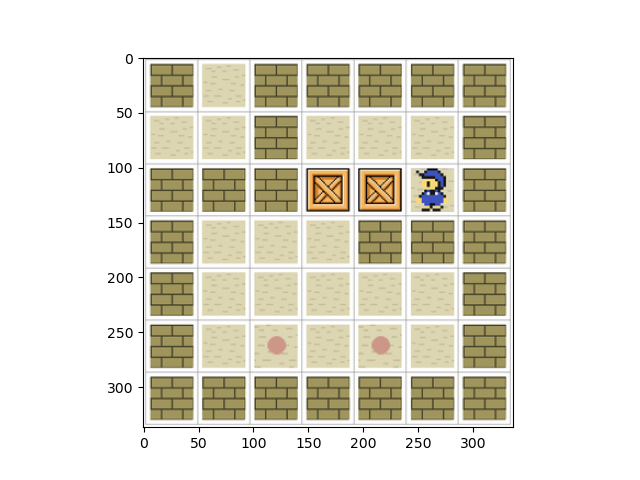

In [1]:
import pddlgym

%matplotlib widget
import matplotlib.pyplot as plt
from IPython.display import clear_output

env = pddlgym.make("PDDLEnvSokoban-v0")
env.fix_problem_index(0)  # task02.pddl
obs, debug_info = env.reset()
img = env.render()
sokoban_img = plt.imshow(img)

In [ ]:
import os
from pyperplan.planner import (
    find_domain,
    HEURISTICS,
    search_plan,
    SEARCHES,
)
from pddlgym.parser import parse_plan_step

search = SEARCHES['astar']
heuristic = HEURISTICS['hmax']

pddl_problem_path = os.path.join('./sokoban', 'task02.pddl')

use_preferred_ops = True
solution = search_plan(
    find_domain(pddl_problem_path),
    pddl_problem_path,
    search,
    heuristic,
    use_preferred_ops=False,
)

act_predicates = [env.domain.predicates[a] for a in list(env.domain.actions)]
plan = [parse_plan_step(plan_step.name[1:-1],
                        env.domain.operators.values(),
                        act_predicates,
                        obs.objects,
                        operators_as_actions=env.domain.operators_as_actions)
        for plan_step in solution]
plt.figure()
for act in plan:
    obs, reward, done, info, _ = env.step(act)
    plt.pause(0.5)
    plt.imshow(env.render())
    plt.show()
    clear_output(wait=True)